In [1]:
from bs4 import BeautifulSoup as BS
import requests
from time import sleep
from random import randint
import pandas as pd
import json
import re
import numpy as np

In [2]:
req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}

# Scrape Data from Zillow

#### Get first 4 pages for each mentioned City

In [7]:
base_url = 'https://www.zillow.com/{}-ca/'
soup=[]
cities = [
    'South-San-Francisco',
    'San-Mateo',
    'Burlingame',
    'San-Jose',
    'San-Francisco',
    'Palo-Alto',
    'Santa-Clara',
    'Cupertino',
    'Milpitas',
    'Fremont',
    'Union-City',
    'Hayward',
    'Castro-Valley',
    'Berkeley',
    'Oakland',
    'San-Leandro',
    'Pleasanton',
    'Dublin',
    'San-Ramon',
    'Danville'
]
for city in cities:
    for i in list(range(1,5)):
        url = base_url.format(city) + "{}_p/".format(i)
        r = requests.Session().get(url, headers=req_headers)
        soup.append(BS(r.content, 'html.parser'))
        sleep(2)

#### Get all Property links from above pages and extract all property attributes
Saved the scrapped data to zillow_listing_full.csv to avoid the re-scrapping everytime.

In [12]:
List_details = []
for s in soup:
    sleep(randint(2,10))
    property_links = [a['href'] for a in s('a',{'class':"list-card-link list-card-link-top-margin"}) if a.has_attr('href')]
    good_urls = list(dict.fromkeys([url for url in property_links]))
    #print(good_urls)
    streetAdress=[]
    city=[]
    state=[]
    zipcode=[]
    for i in good_urls:
        info = {}
        text_ref = requests.get(i, headers = req_headers)
        soup_ref = BS(text_ref.content, "html.parser")
        script_tag = soup_ref.find('script', id="hdpApolloPreloadedData", type="application/json")
        value = re.findall(r'<script id="hdpApolloPreloadedData" type="application/json">(.*?)</script>',
                                   script_tag.decode())
        json_data = json.loads("".join(value))
        final_json = json.loads(json_data['apiCache'])
        zpid = i.split('_')[0]
        if 'ForSaleDoubleScrollFullRenderQuery' in str(soup_ref):
            Tag = 'ForSaleDoubleScrollFullRenderQuery{"zpid":' + zpid.split('/')[-1] + ',"contactFormRenderParameter":{"zpid":' + zpid.split('/')[-1] + ',"platform":"desktop","isDoubleScroll":true}}'
        elif 'NewConstructionInitialRenderSEOQuery' in str(soup_ref):
            Tag = 'NewConstructionInitialRenderSEOQuery{"zpid":' + zpid.split('/')[-1] + '}'
        elif 'OffMarketDoubleScrollFullRenderQuery' in str(soup_ref):
             Tag = 'OffMarketDoubleScrollFullRenderQuery{"zpid":' + zpid.split('/')[-1] + ',"contactFormRenderParameter":{"zpid":' + zpid.split('/')[-1] + ',"platform":"desktop","isDoubleScroll":true}}'
        elif 'NotForSaleShopperPlatformFullRenderQuery' in str(soup_ref):
            Tag = 'NotForSaleShopperPlatformFullRenderQuery{"zpid":' + zpid.split('/')[-1] + ',"contactFormRenderParameter":{"zpid":' + zpid.split('/')[-1] + ',"platform":"desktop","isDoubleScroll":true}}'
        else:
            Tag = None
        #Tag= 'ForSaleDoubleScrollFullRenderQuery{"zpid":' +zpid.split('/')[-1] + ',"contactFormRenderParameter":{"zpid":' +zpid.split('/')[-1] + ',"platform":"desktop","isDoubleScroll":true}}'
        #Tag='VariantQuery{"zpid":'+zpid.split('/')[-1]+',"altId":null}'
        try:
            info['StreetAddress']=final_json[Tag]['property'].get('streetAddress',None)
        except Exception as e:
            info['StreetAddress'] = e
        try:
            info['City']=final_json[Tag]['property'].get('city',None)
        except Exception as e:
            info['City'] = e
        try:
            info['State']=final_json[Tag]['property'].get('state',None)
        except Exception as e:
            info['State'] = e
        try:
            info['ZipCode']=final_json[Tag]['property'].get('zipcode',None)
        except Exception as e:
            info['ZipCode'] = e
        try:
            info['Latitude']=final_json[Tag]['property'].get('latitude',None)
        except Exception as e:
            info['Latitude'] = e
        try:
            info['Longitude']=final_json[Tag]['property'].get('longitude',None)
        except Exception as e:
            info['Longitude'] = e
        try:
            info['Price']=final_json[Tag]['property'].get('price',None)
        except Exception as e:
            info['Price'] = e
        try:
            info['YearBuilt']=final_json[Tag]['property'].get('yearBuilt',None)
        except Exception as e:
            info['YearBuilt'] = e
        try:
            info['LotSize']=final_json[Tag]['property'].get('lotSize',None)
        except Exception as e:
            info['LotSize'] = e
        try:
            info['HomeType']=final_json[Tag]['property'].get('homeType',None)
        except Exception as e:
            info['HomeType'] = e
        try:
            info['Zestimate']=final_json[Tag]['property'].get('zestimate',None)
        except Exception as e:
            info['Zestimate'] = e
        try:
            info['Bedrooms']=final_json[Tag]['property'].get('bedrooms',None)
        except Exception as e:
            info['Bedrooms'] = e
        try:
            info['Bathrooms']=final_json[Tag]['property'].get('bathrooms',None)
        except Exception as e:
            info['Bathrooms'] = e
        try:
            info['LivingArea']=final_json[Tag]['property'].get('livingArea',None)
        except Exception as e:
            info['LivingArea'] = e
        try:
            info['HOA']=final_json[Tag]['property'].get('monthlyHoaFee',None)
        except Exception as e:
            info['HOA'] = e
        try:
            info['BrokerageName']=final_json[Tag]['property'].get('brokerageName',None)
        except Exception as e:
            info['BrokerageName'] = e
        try:
            info['LastSoldPrice']=final_json[Tag]['property'].get('lastSoldPrice',None)
        except Exception as e:
            info['LastSoldPrice'] = e
        try:
            info['HomeStatus']=final_json[Tag]['property'].get('homeStatus',None)
        except Exception as e:
            info['HomeStatus'] = e
        try:
            info['Parking']=final_json[Tag]['property']['resoFacts'].get('parkingCapacity',None)
        except Exception as e:
            info['Parking'] = e

        sleep(randint(2,10))
        List_details.append(info)

df= pd.DataFrame(List_details)
df.to_csv('zillow_listing_full.csv')

# Data Cleaning

#### Load data back to data frame

In [248]:
df = pd.read_csv('zillow_listing_full.csv', usecols=range(1,20))
df.count()

StreetAddress    713
City             713
State            713
ZipCode          713
Latitude         712
Longitude        712
Price            713
YearBuilt        668
LotSize          676
HomeType         713
Zestimate        603
Bedrooms         669
Bathrooms        686
LivingArea       711
HOA              317
BrokerageName    713
LastSoldPrice    510
HomeStatus       713
Parking          713
dtype: int64

#### Remove Duplicates

In [249]:
#df.loc[df.duplicated(),:]
df.drop_duplicates(inplace = True)
df.count()

StreetAddress    326
City             326
State            326
ZipCode          326
Latitude         325
Longitude        325
Price            326
YearBuilt        303
LotSize          309
HomeType         326
Zestimate        266
Bedrooms         295
Bathrooms        309
LivingArea       324
HOA              126
BrokerageName    326
LastSoldPrice    230
HomeStatus       326
Parking          326
dtype: int64

#### Remove records where Street Address is not available

In [250]:
df = df[df['StreetAddress'] !='None']
df.count()

StreetAddress    325
City             325
State            325
ZipCode          325
Latitude         324
Longitude        324
Price            325
YearBuilt        302
LotSize          308
HomeType         325
Zestimate        265
Bedrooms         294
Bathrooms        308
LivingArea       323
HOA              125
BrokerageName    325
LastSoldPrice    229
HomeStatus       325
Parking          325
dtype: int64

#### Check and Remove/Replace missing Values

In [252]:
df.isna().sum()

StreetAddress      0
City               0
State              0
ZipCode            0
Latitude           1
Longitude          1
Price              0
YearBuilt         23
LotSize           17
HomeType           0
Zestimate         60
Bedrooms          31
Bathrooms         17
LivingArea         2
HOA              200
BrokerageName      0
LastSoldPrice     96
HomeStatus         0
Parking            0
dtype: int64

In [253]:
df = df.dropna(subset=['YearBuilt', 'LivingArea','Zestimate','Bedrooms','Bathrooms','LotSize'])
df.loc[df["HOA"].isna(), "HOA"] = 0
df.loc[df["LastSoldPrice"].isna(), "LastSoldPrice"] = 0
df.isna().sum()

StreetAddress    0
City             0
State            0
ZipCode          0
Latitude         0
Longitude        0
Price            0
YearBuilt        0
LotSize          0
HomeType         0
Zestimate        0
Bedrooms         0
Bathrooms        0
LivingArea       0
HOA              0
BrokerageName    0
LastSoldPrice    0
HomeStatus       0
Parking          0
dtype: int64

#### Check and Update Data types

In [254]:
df.dtypes

StreetAddress    object
City             object
State            object
ZipCode          object
Latitude         object
Longitude        object
Price            object
YearBuilt        object
LotSize          object
HomeType         object
Zestimate        object
Bedrooms         object
Bathrooms        object
LivingArea       object
HOA              object
BrokerageName    object
LastSoldPrice    object
HomeStatus       object
Parking          object
dtype: object

In [255]:
df['Price'] = df['Price'].astype('int')
df['YearBuilt'] = df['YearBuilt'].astype('int')
df['LotSize'] = df['LotSize'].astype('int')
df['Zestimate'] = df['Zestimate'].astype('int')
df['Bedrooms'] = df['Bedrooms'].astype('int')
df['Bathrooms'] = df['Bathrooms'].astype('int')
df['LivingArea'] = df['LivingArea'].astype('int')
df['HOA'] = df['HOA'].astype('int')
df['LastSoldPrice'] = df['LastSoldPrice'].astype('int')
df['Parking'] = df['Parking'].astype('int')
df.dtypes

StreetAddress    object
City             object
State            object
ZipCode          object
Latitude         object
Longitude        object
Price             int32
YearBuilt         int32
LotSize           int32
HomeType         object
Zestimate         int32
Bedrooms          int32
Bathrooms         int32
LivingArea        int32
HOA               int32
BrokerageName    object
LastSoldPrice     int32
HomeStatus       object
Parking           int32
dtype: object

#### Create Box plots to check Outliers

<AxesSubplot:title={'center':'Box Plot : Parking'}, xlabel='Parking'>

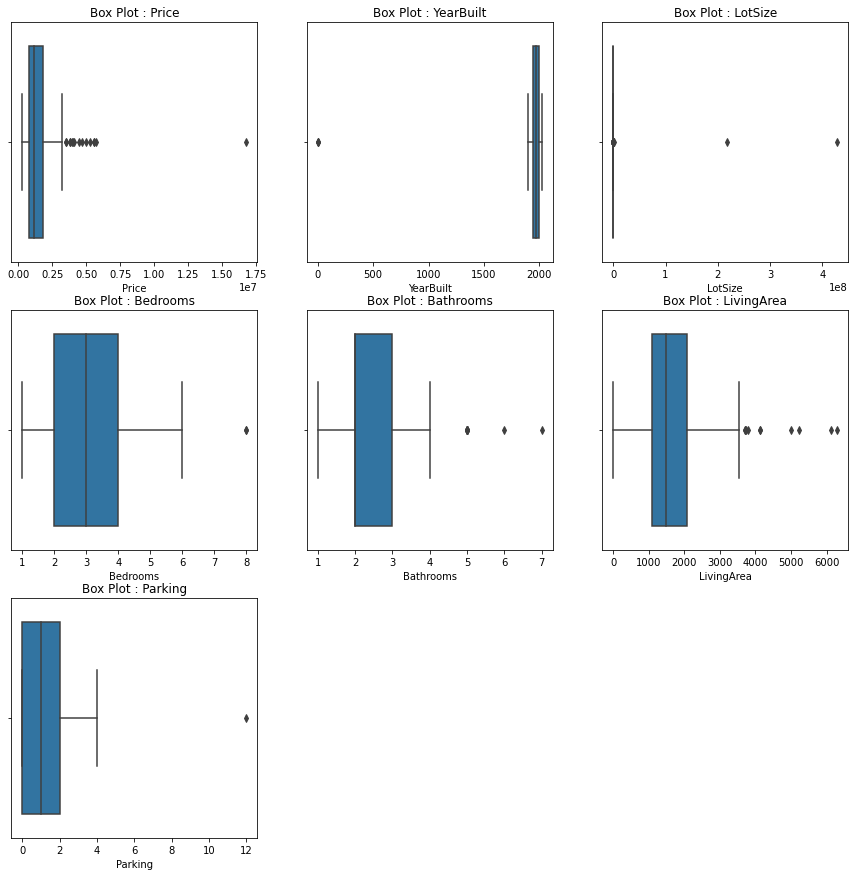

In [256]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
fig = plt.figure(figsize=(15,15))
plt.subplot(331)
plt.title('Box Plot : Price')
sns.boxplot(x=df['Price'])

plt.subplot(332)
plt.title('Box Plot : YearBuilt')
sns.boxplot(x=df['YearBuilt'])

plt.subplot(333)
plt.title('Box Plot : LotSize')
sns.boxplot(x=df['LotSize'])

plt.subplot(334)
plt.title('Box Plot : Bedrooms')
sns.boxplot(x=df['Bedrooms'])

plt.subplot(335)
plt.title('Box Plot : Bathrooms')
sns.boxplot(x=df['Bathrooms'])

plt.subplot(336)
plt.title('Box Plot : LivingArea')
sns.boxplot(x=df['LivingArea'])

plt.subplot(337)
plt.title('Box Plot : Parking')
sns.boxplot(x=df['Parking'])

#### Identify Outlier records and Remove it

In [258]:
df.reset_index(drop=True, inplace=True)
lst=[]
print('Outlier row numbers for Price is:', np.where(df['Price']>3000000))
arr=np.where(df['Price']>3000000)
lst.append(arr[0].tolist())
print('Outlier row numbers for YearBuilt is:', np.where(df['YearBuilt']<1900))
arr=np.where(df['YearBuilt']<1900)
lst.append(arr[0].tolist())
print('Outlier row numbers for LotSize is:', np.where(df['LotSize']>20000))
arr=np.where(df['LotSize']>20000)
lst.append(arr[0].tolist())
print('Outlier row numbers for LivingArea is:', np.where(df['LivingArea']>3700))
arr=np.where(df['LivingArea']>3700)
lst.append(arr[0].tolist())
print('Outlier row numbers for Parking is:', np.where(df['Parking']>4))
arr=np.where(df['Parking']>4)
lst.append(arr[0].tolist())
print('Outlier row numbers for Bedrooms is:', np.where(df['Bedrooms']>6))
arr=np.where(df['Bedrooms']>6)
lst.append(arr[0].tolist())
print('Outlier row numbers for Bathrooms is:', np.where(df['Bathrooms']>5))
arr=np.where(df['Bathrooms']>5)
lst.append(arr[0].tolist())
flat_list = [item for sublist in lst for item in sublist]

Outlier row numbers for Price is: (array([ 17,  24,  27,  84,  86,  90,  91,  92,  93,  94,  97,  99, 115,
       119, 122, 170], dtype=int64),)
Outlier row numbers for YearBuilt is: (array([ 70,  72,  83, 221], dtype=int64),)
Outlier row numbers for LotSize is: (array([  1,   7,  11,  28,  67,  72,  74,  76,  78, 134, 139, 148, 163,
       170, 201, 208, 220, 239], dtype=int64),)
Outlier row numbers for LivingArea is: (array([ 24,  86,  94, 115, 170, 200, 204, 213, 239, 241], dtype=int64),)
Outlier row numbers for Parking is: (array([170], dtype=int64),)
Outlier row numbers for Bedrooms is: (array([204, 213], dtype=int64),)
Outlier row numbers for Bathrooms is: (array([ 94, 115], dtype=int64),)


In [259]:
df.drop(list(set(flat_list)), inplace = True)
df.count()

StreetAddress    204
City             204
State            204
ZipCode          204
Latitude         204
Longitude        204
Price            204
YearBuilt        204
LotSize          204
HomeType         204
Zestimate        204
Bedrooms         204
Bathrooms        204
LivingArea       204
HOA              204
BrokerageName    204
LastSoldPrice    204
HomeStatus       204
Parking          204
dtype: int64

#### Create Box plots to re-verify Outliers

<AxesSubplot:title={'center':'Box Plot : Parking'}, xlabel='Parking'>

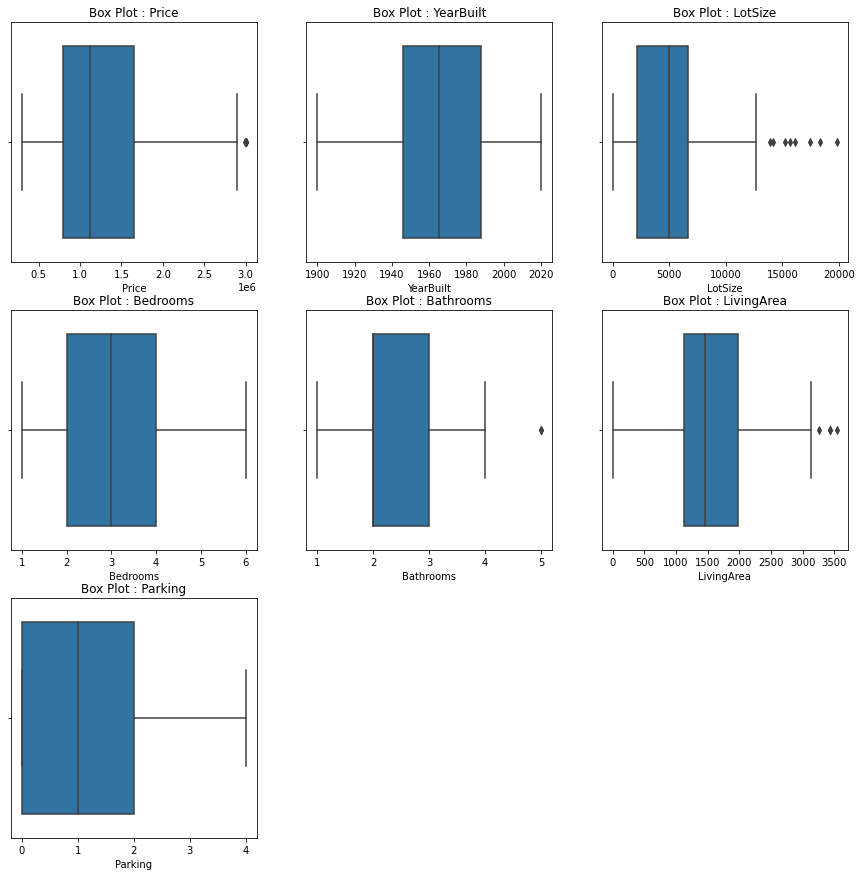

In [260]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
fig = plt.figure(figsize=(15,15))
plt.subplot(331)
plt.title('Box Plot : Price')
sns.boxplot(x=df['Price'])

plt.subplot(332)
plt.title('Box Plot : YearBuilt')
sns.boxplot(x=df['YearBuilt'])

plt.subplot(333)
plt.title('Box Plot : LotSize')
sns.boxplot(x=df['LotSize'])

plt.subplot(334)
plt.title('Box Plot : Bedrooms')
sns.boxplot(x=df['Bedrooms'])

plt.subplot(335)
plt.title('Box Plot : Bathrooms')
sns.boxplot(x=df['Bathrooms'])

plt.subplot(336)
plt.title('Box Plot : LivingArea')
sns.boxplot(x=df['LivingArea'])

plt.subplot(337)
plt.title('Box Plot : Parking')
sns.boxplot(x=df['Parking'])

#### Write the Clean data to final_zillow_group7.csv

In [262]:
df.reset_index(drop=True, inplace=True)
df.to_csv("final_zillow_group7.csv")